# English descriptions

In [12]:
import os
import xml.etree.ElementTree as ET
from collections import Counter

folder = "./xml/20250101"
lang_counts = Counter()

for file in os.listdir(folder):
    if file.endswith(".xml"):
        filepath = os.path.join(folder, file)
        try:
            tree = ET.parse(filepath)
            root = tree.getroot()
            for desc in root.findall(".//description"):
                lang = desc.attrib.get("lang")
                if lang:
                    lang_counts[lang] += 1
        except Exception as e:
            print(f"Error parsing {file}: {e}")

print("Language counts:")
for lang, count in lang_counts.items():
    print(f"{lang}: {count}")


Language counts:
en: 1977
fr: 149
de: 291


# Investigate headings

In [6]:
heading_counts = Counter()
headings_per_doc = {}

for file in os.listdir(folder):
    if file.endswith(".xml"):
        filepath = os.path.join(folder, file)
        try:
            tree = ET.parse(filepath)
            root = tree.getroot()
            
            # Find <description id="desc" lang="en">
            desc = root.find(".//description[@id='desc'][@lang='en']")
            if desc is not None:
                headings = desc.findall(".//heading")
                
                # Count headings per doc
                headings_per_doc[file] = len(headings)
                
                # Count normalized heading text
                for h in headings:
                    if h.text:
                        heading_counts[h.text.strip().upper()] += 1

        except Exception as e:
            print(f"Error parsing {file}: {e}")

In [65]:
print("Most common headings (normalized):")
for heading, count in heading_counts.most_common(50):
    print(f"{heading}: {count}")

Most common headings (normalized):
BRIEF DESCRIPTION OF THE DRAWINGS: 438
BACKGROUND: 388
DETAILED DESCRIPTION: 360
SUMMARY: 312
TECHNICAL FIELD: 281
SUMMARY OF THE INVENTION: 168
BACKGROUND ART: 136
BRIEF DESCRIPTION OF DRAWINGS: 118
BACKGROUND OF THE INVENTION: 109
DESCRIPTION OF EMBODIMENTS: 92
REMARKS: 87
EXAMPLES: 82
FIELD OF THE INVENTION: 82
[TECHNICAL FIELD]: 81
CITATION LIST: 80
SUMMARY OF INVENTION: 80
FIELD: 79
[BACKGROUND ART]: 76
TECHNICAL PROBLEM: 73
[TECHNICAL PROBLEM]: 64
SOLUTION TO PROBLEM: 61
REFERENCE SIGNS LIST: 61
PATENT LITERATURE: 59
DETAILED DESCRIPTION OF THE INVENTION: 49
ADVANTAGEOUS EFFECTS OF INVENTION: 47
[TECHNICAL SOLUTION]: 44
[STEP A]: 42
[STEP B]: 38
[BRIEF DESCRIPTION OF DRAWINGS]: 37
[ADVANTAGEOUS EFFECTS]: 37
EXAMPLE 1: 36
[DISCLOSURE]: 34
[DESCRIPTION OF DRAWINGS]: 32
INDUSTRIAL APPLICABILITY: 31
EXAMPLE 2: 30
[STEP C]: 30
CROSS-REFERENCE TO RELATED APPLICATIONS: 29
BRIEF DESCRIPTION: 28
DETAILED DESCRIPTION OF EMBODIMENTS: 27
EXAMPLE 3: 26
BRIEF

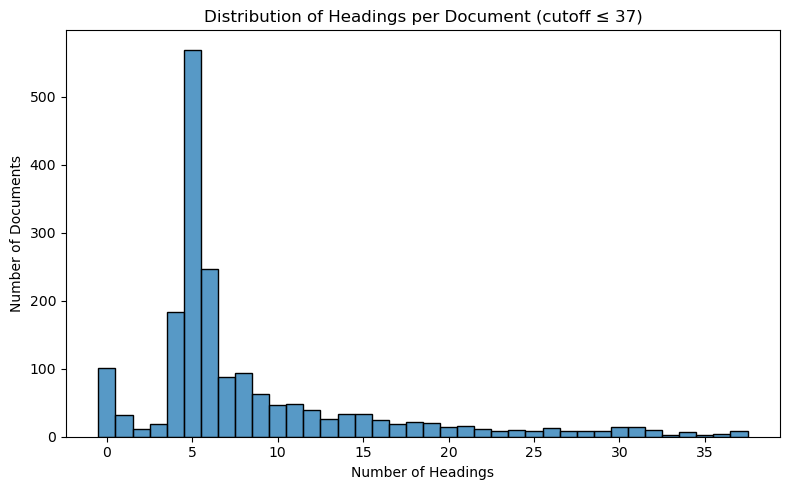

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

counts = list(headings_per_doc.values())

# 95th percentile cutoff
cutoff = int(np.percentile(counts, 95))
trimmed_counts = [c for c in counts if c <= cutoff]

plt.figure(figsize=(8,5))
sns.histplot(trimmed_counts, bins=range(min(trimmed_counts), max(trimmed_counts)+2), discrete=True)

plt.title(f"Distribution of Headings per Document (cutoff ≤ {cutoff})")
plt.xlabel("Number of Headings")
plt.ylabel("Number of Documents")
plt.tight_layout()
plt.show()


In [69]:
BACKGROUND_HEADINGS = {
    "BACKGROUND",
    "BACKGROUND ART",
    "BACKGROUND OF THE INVENTION",
    "[BACKGROUND ART]",
    "TECHNICAL FIELD",
    "FIELD OF THE INVENTION",
    "[TECHNICAL FIELD]",
    "FIELD"
}

SUMMARY_HEADINGS = {
    "SUMMARY",
    "SUMMARY OF THE INVENTION",
    "SUMMARY OF INVENTION",
    "BRIEF SUMMARY",
    "[SUMMARY OF INVENTION]"
}

DESCRIPTION_HEADINGS = {
    "DETAILED DESCRIPTION",
    "DETAILED DESCRIPTION OF THE INVENTION",
    "DESCRIPTION OF EMBODIMENTS",
    "DETAILED DESCRIPTION OF EMBODIMENTS",
    "BRIEF DESCRIPTION OF THE DRAWINGS",
    "BRIEF DESCRIPTION OF DRAWINGS",
    "[BRIEF DESCRIPTION OF DRAWINGS]",
    "[DESCRIPTION OF DRAWINGS]"
}


In [70]:
from collections import Counter

selected_docs = []

for file in os.listdir(folder):
    if file.endswith(".xml"):
        filepath = os.path.join(folder, file)
        try:
            tree = ET.parse(filepath)
            root = tree.getroot()
            
            desc = root.find(".//description[@id='desc'][@lang='en']")
            if desc is not None:
                headings = [h.text.strip().upper() for h in desc.findall(".//heading") if h.text]
                
                has_background = any(h in BACKGROUND_HEADINGS for h in headings)
                has_summary = any(h in SUMMARY_HEADINGS for h in headings)
                has_description = any(h in DESCRIPTION_HEADINGS for h in headings)
                
                if has_background and has_summary and has_description:
                    selected_docs.append(file)
        except Exception as e:
            print(f"Error parsing {file}: {e}")

print(f"Selected {len(selected_docs)} patents with all three main sections")
percentage = 100 * len(selected_docs) / len(os.listdir(folder))
print(f"Percentage of total: {percentage:.2f}%")


Selected 543 patents with all three main sections
Percentage of total: 22.46%


> Using headings seems like a nightmare, not standardized enough

# XML tags in description

In [13]:
for file in os.listdir(folder):
    if file.endswith(".xml"):
        filepath = os.path.join(folder, file)
        try:
            tree = ET.parse(filepath)
            root = tree.getroot()

            # Loop over all <description> blocks
            for desc in root.findall(".//description"):
                for elem in desc.iter():
                    if elem is not desc:  # exclude the <description> itself
                        tag_counter[elem.tag] += 1

        except Exception as e:
            print(f"Error parsing {file}: {e}")

In [14]:
print("Most common tags inside <description>:")
for tag, count in tag_counter.most_common(100):
    print(f"{tag}: {count}")


Most common tags inside <description>:
p: 247991
entry: 152548
figref: 114804
sub: 63311
li: 55674
b: 41977
i: 33491
row: 31555
mi: 30402
sup: 26270
heading: 24797
text: 17455
colspec: 15323
img: 13787
mo: 13762
patcit: 13074
dt: 9860
dd: 9860
chemistry: 9001
mn: 8096
msub: 7945
ul: 7811
u: 7405
mfenced: 5019
br: 4987
mrow: 4783
nplcit: 4381
maths: 3415
math: 3296
tables: 3131
tgroup: 3071
tbody: 3071
table: 2665
thead: 2428
mspace: 2055
title: 1953
msubsup: 1737
mfrac: 1686
mtd: 1388
ol: 1205
msup: 1164
mtr: 955
dl: 855
mstyle: 573
mover: 464
mtable: 366
o: 260
msqrt: 160
formula-text: 104
sub2: 90
munderover: 89
munder: 74
none: 71
mmultiscripts: 58
mprescripts: 58
pre: 41
sup2: 8
malignmark: 2
mroot: 2


# Clean tags

In [16]:
from lxml import etree
import os

DROP_TAGS = {
    "chemistry", "heading", "img", "maths",
    "table", "tgroup", "row", "entry", "colspec", "tbody"
}

UNWRAP_TAGS = {"b", "i", "u", "sup", "sub", "br", "p", "patcit", "figref", "li", "ul", "ol"}

def aggressive_clean(desc_elem):
    # Unwrap allowed tags first
    for tag in UNWRAP_TAGS:
        for elem in desc_elem.findall(f".//{tag}"):
            parent = elem.getparent()
            if parent is None:
                continue
            text_to_add = (elem.text or "") + (elem.tail or "")
            if parent.text:
                parent.text += text_to_add
            else:
                parent.text = text_to_add
            parent.remove(elem)

    # Remove all remaining unwanted tags
    for tag in DROP_TAGS:
        for elem in desc_elem.findall(f".//{tag}"):
            parent = elem.getparent()
            if parent is not None:
                parent.remove(elem)

    # Extract text
    cleaned_text = " ".join(desc_elem.itertext())
    cleaned_text = " ".join(cleaned_text.split())  # normalize whitespace

    return cleaned_text

# Folder with XML files
folder = "./xml/20250101"
output_file = "cleaned_descriptions.txt"

with open(output_file, "w", encoding="utf-8") as f_out:
    for file in os.listdir(folder):
        if file.endswith(".xml"):
            filepath = os.path.join(folder, file)
            try:
                tree = etree.parse(filepath)
                root = tree.getroot()
                desc = root.find(".//description[@id='desc'][@lang='en']")
                if desc is not None:
                    text = aggressive_clean(desc)
                    if text:
                        f_out.write(text + "\n")
            except Exception as e:
                print(f"Error parsing {file}: {e}")

print(f"All cleaned descriptions saved to {output_file}")


All cleaned descriptions saved to cleaned_descriptions.txt


In [30]:
import random


with open('cleaned_descriptions.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()   # read all lines into a list
    
seed = random.randint(0,len(lines)-1)
print(seed)
print(lines[seed])

708
The present invention relates to systems and methods for measurement of the mass of ions species in a mass stream of a separation device, in particular, by the determination of the masses of ion species from mass traces measured by a mass spectrometer. The use of mass spectrometry (MS) techniques has become invaluable across many fields where detailed analysis of various chemical, and often biological, samples is required. Such mass spectrometry analysis is used to identify the chemical composition of given samples. Straightforward analysis in a mass spectrometer typically involves the generation of ions from a chemical sample. The mass-to-charge ratio (m/z) and abundance of these ions are then measured by the mass spectrometer to produce a mass spectrum. The peaks (or centroids) in intensity at particular m/z values in such a mass spectrum provides a signature that indicates the relative abundance and mass of respective ions. This signature allows the compound (or compounds) that 

# Cleaned and remove first and last paragraphs

In [21]:
from lxml import etree
import os

# Tags to remove completely
DROP_TAGS = {
    "chemistry", "heading", "img",
    "table", "tgroup", "row", "entry", "colspec", "tbody"
}

# Tags to unwrap and keep text
UNWRAP_TAGS = {"b", "i", "u", "sup", "sub", "br", "p", "patcit", "figref", "li", "ul", "ol"}

def aggressive_clean(desc_elem):
    # Remove first and last <p> if they exist
    p_elements = desc_elem.findall(".//p")
    if p_elements:
        if len(p_elements) >= 1:
            parent = p_elements[0].getparent()
            if parent is not None:
                parent.remove(p_elements[0])
        if len(p_elements) >= 2:
            parent = p_elements[-1].getparent()
            if parent is not None:
                parent.remove(p_elements[-1])

    # Unwrap allowed tags first
    for tag in UNWRAP_TAGS:
        for elem in desc_elem.findall(f".//{tag}"):
            parent = elem.getparent()
            if parent is None:
                continue
            text_to_add = (elem.text or "") + (elem.tail or "")
            if parent.text:
                parent.text += text_to_add
            else:
                parent.text = text_to_add
            parent.remove(elem)

    # Remove all remaining unwanted tags
    for tag in DROP_TAGS:
        for elem in desc_elem.findall(f".//{tag}"):
            parent = elem.getparent()
            if parent is not None:
                parent.remove(elem)

    # Extract cleaned text
    cleaned_text = " ".join(desc_elem.itertext())
    cleaned_text = " ".join(cleaned_text.split())  # normalize whitespace
    return cleaned_text

# Folder with XML files
folder = "./xml/20250101"
output_file = "cleaned_descriptions_trimmed.txt"

with open(output_file, "w", encoding="utf-8") as f_out:
    for file in os.listdir(folder):
        if file.endswith(".xml"):
            filepath = os.path.join(folder, file)
            try:
                tree = etree.parse(filepath)
                root = tree.getroot()
                desc = root.find(".//description[@id='desc'][@lang='en']")
                if desc is not None:
                    text = aggressive_clean(desc)
                    if text:
                        f_out.write(text + "\n")
            except Exception as e:
                print(f"Error parsing {file}: {e}")

print(f"All cleaned descriptions saved to {output_file}")


All cleaned descriptions saved to cleaned_descriptions_trimmed.txt


In [32]:
with open('cleaned_descriptions_trimmed.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()   # read all lines into a list

print(lines[seed])

The use of mass spectrometry (MS) techniques has become invaluable across many fields where detailed analysis of various chemical, and often biological, samples is required. Such mass spectrometry analysis is used to identify the chemical composition of given samples. Straightforward analysis in a mass spectrometer typically involves the generation of ions from a chemical sample. The mass-to-charge ratio (m/z) and abundance of these ions are then measured by the mass spectrometer to produce a mass spectrum. The peaks (or centroids) in intensity at particular m/z values in such a mass spectrum provides a signature that indicates the relative abundance and mass of respective ions. This signature allows the compound (or compounds) that are comprised in the original chemical sample to be identified. For samples that comprise a large number of different compounds, such as biological samples, MS techniques are often combined with separation techniques. Separation techniques typically involve

# More markdown friendly claims (keep some formatting and add tokens)

In [59]:
import json
from lxml import etree
import os
import re

# -------------------------------
# Tags and special tokens
# -------------------------------
DROP_TAGS = {"img", "table", "tgroup", "row", "entry", "colspec", "tbody"}
SPECIAL_TOKENS = {
    "figref": "<FIG>",
    "patcit": "<PATICIT>",
    "nplcit": "<NPLCIT>",
    "chemistry": "<CHEM>",
    "maths": "<MATH>"
}

HEADERS = {"heading"}  # add more if needed

# -------------------------------
# SI units (common in patents)
# -------------------------------
SI_UNITS = [
    "m","cm","mm","kg","g","L","ml","s","Hz","A","V","°C","K","nm","µm","um","Pa","N"
]
# compile regex for number with optional SI units
UNITS_PATTERN = "|".join(SI_UNITS)
NUM_REGEX = re.compile(
    rf"(?<![A-Za-z])(\d+(\.\d+)?)(\s*({UNITS_PATTERN}))?(?=[\s\.,;\)])",
    flags=re.IGNORECASE
)

# -------------------------------
# Helper functions
# -------------------------------
def replace_numbers(text):
    """Replace numbers with optional SI units with <NUM>"""
    return NUM_REGEX.sub("<NUM>", text)

def clean_element(elem):
    """Recursively extract text with paragraph and special token handling."""
    texts = []

    if elem.tag in DROP_TAGS:
        return []

    # Replace chemistry/maths with special token instead of unwrapping
    if elem.tag in SPECIAL_TOKENS:
        texts.append(SPECIAL_TOKENS[elem.tag])
        return texts

    # Headers
    if elem.tag in HEADERS:
        header_text = (elem.text or "").strip()
        if header_text:
            texts.append("## " + " ".join(header_text.split()))

    # Special tokens like figref, patcit, nplcit
    elif elem.tag in {"figref", "patcit", "nplcit"}:
        texts.append(SPECIAL_TOKENS[elem.tag])

    # Paragraphs
    elif elem.tag == "p":
        para_text = []
        if elem.text:
            para_text.append(elem.text)
        for child in elem:
            para_text.extend(clean_element(child))
            if child.tail:
                para_text.append(child.tail)
        if para_text:
            para_text_str = " ".join(para_text)
            para_text_str = " ".join(para_text_str.split())
            para_text_str = replace_numbers(para_text_str)
            texts.append(para_text_str + "\n\n")  # paragraph separator

    # Other tags
    else:
        if elem.text:
            para_text_str = replace_numbers(elem.text)
            texts.append(para_text_str)
        for child in elem:
            texts.extend(clean_element(child))
            if child.tail:
                tail_text = replace_numbers(child.tail)
                texts.append(tail_text)

    return texts

def aggressive_clean(desc_elem):
    """Clean description element, remove comments, normalize text, replace numbers."""
    etree.strip_tags(desc_elem, etree.Comment)
    all_texts = clean_element(desc_elem)
    cleaned_text = "".join(all_texts)
    cleaned_text = re.sub(r'[ \t]+', ' ', cleaned_text)
    cleaned_text = re.sub(r'\n{3,}', '\n\n', cleaned_text)
    return cleaned_text.strip()

folder = "./xml/20250101"
output_file = "cleaned_descriptions.jsonl"

with open(output_file, "w", encoding="utf-8") as f_out:
    for file in os.listdir(folder):
        if file.endswith(".xml"):
            filepath = os.path.join(folder, file)
            try:
                tree = etree.parse(filepath)
                root = tree.getroot()
                desc = root.find(".//description[@id='desc'][@lang='en']")
                if desc is not None:
                    text = aggressive_clean(desc)
                    if text:
                        json.dump({"text": text}, f_out)
                        f_out.write("\n")
            except Exception as e:
                print(f"Error parsing {file}: {e}")

print(f"All cleaned descriptions saved to {output_file}")


All cleaned descriptions saved to cleaned_descriptions.jsonl


In [64]:
with open('cleaned_descriptions.jsonl', 'r', encoding='utf-8') as f:
    lines = f.readlines()   # read all lines into a list

print(lines[18])
print(len(lines))

{"text": "The invention generally relates to a fuel nozzle, which is intentionally used at a combustion arrangement of a gas turbine as a second (or later) stage fuel injector downstream to a primary burner. Thereby the fuel nozzle enables the introduction of fuel and air into a secondary combustion zone.\n\nCombustion arrangements of gas turbines comprise a combustion chamber with at least one primary burner arranged at the head end of the combustion chamber. This defines a primary combustion zone adjacent to the burner within the combustion chamber. In regular embodiments a transition is arranged downstream the combustion chamber guiding the combustion gases from the combustion chamber to an expansion turbine.\n\nTo minimize the overall production of NOx emissions common embodiments of combustion arrangements comprise downstream to the primary combustion zone a further secondary combustion zone. This is enabled by the arrangement of secondary stage fuel nozzles within the transition.

# Remaining "tags"


In [23]:
import re

output_file = "cleaned_descriptions.txt"

# regex to find anything looking like a tag
tag_pattern = re.compile(r"<([a-zA-Z0-9]+)[^>]*>")

tags_found = set()

with open(output_file, "r", encoding="utf-8") as f:
    for line in f:
        for match in tag_pattern.findall(line):
            tags_found.add(match)

if tags_found:
    print("Remaining tags found in the cleaned text:")
    for tag in sorted(tags_found):
        print(tag)
else:
    print("No remaining tags found. Text appears clean.")


Remaining tags found in the cleaned text:
0
001
0vw
1
10
100
1000
100kb
10eV
110
111
112
15
180
2
211
3
30
4
60
634
7
711
8
90
90mmHg
BNG
Chemical
Closest
Composite
Compound
Device
Dim
EXECUTE
Effects
Example
Find
H
Implementation
M
MCC
MNC
Molding
My
Play
Powder
RTX
Rc
Receiver
Show
Stress
T
Table
Tell
V
Vth2
What
X
X2
Zone
eob
execute
first
h
inner
metadata
n1
name
one
optional
outer
person
port
program
slot
subslot
the
third
trunk
trunkid
up
uvw
vR


# Login HF


In [1]:
from huggingface_hub import notebook_login

notebook_login()

# Count Tokens

In [3]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a tokenizer (e.g., GPT-2, LLaMA, or any you plan to pretrain with)
tokenizer = AutoTokenizer.from_pretrained("google/gemma-3-1b-it")  # replace with your model

input_file = "cleaned_descriptions_trimmed.txt"

token_lengths = []

with open(input_file, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if line:
            tokens = tokenizer.encode(line)
            token_lengths.append(len(tokens))


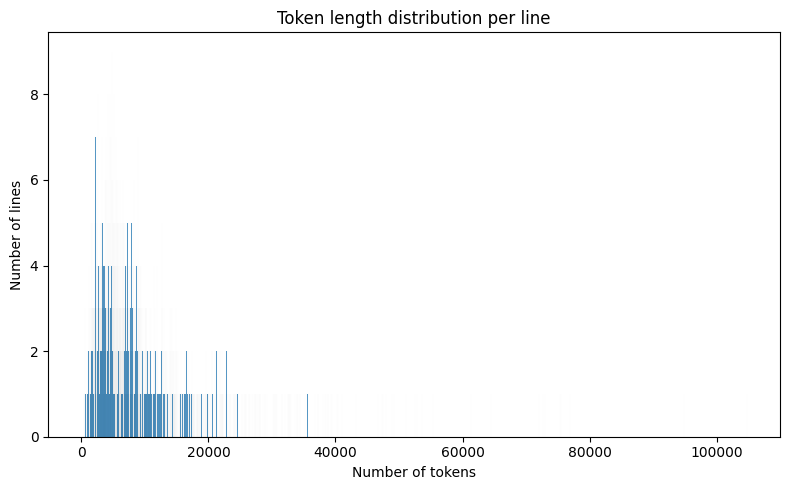

Total lines: 2523
Mean tokens per line: 8339.7
Max tokens in a line: 104746
Min tokens in a line: 419


In [4]:

# Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(token_lengths, bins=range(0, max(token_lengths)+10, 10), kde=False)
plt.title("Token length distribution per line")
plt.xlabel("Number of tokens")
plt.ylabel("Number of lines")
plt.tight_layout()
plt.show()

# Optional: print some stats
print(f"Total lines: {len(token_lengths)}")
print(f"Mean tokens per line: {sum(token_lengths)/len(token_lengths):.1f}")
print(f"Max tokens in a line: {max(token_lengths)}")
print(f"Min tokens in a line: {min(token_lengths)}")


# Count token with outliers removed

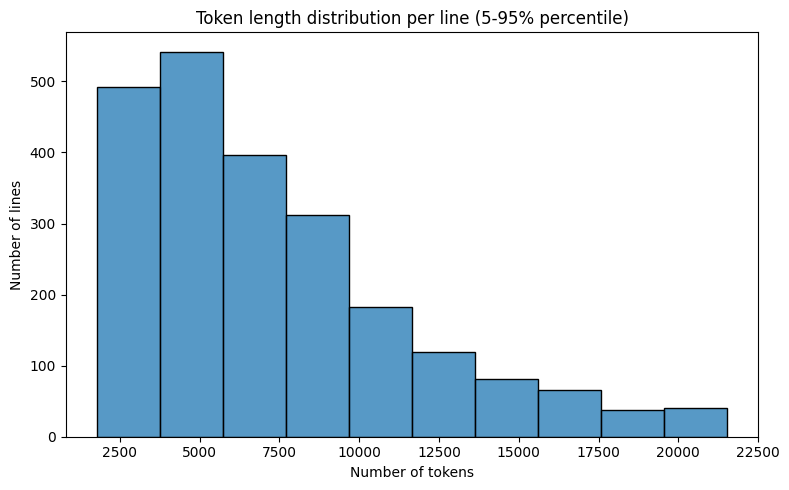

Lines after filtering: 2269
Mean tokens: 7288.2
Min tokens: 1785, Max tokens: 21521


In [6]:
import numpy as np
# Convert to numpy array for percentile calculation
lengths = np.array(token_lengths)

# Compute 5th and 95th percentiles
low, high = np.percentile(lengths, [5, 95])

# Filter lengths between 5th and 95th percentile
filtered_lengths = lengths[(lengths >= low) & (lengths <= high)]

# Plot histogram
plt.figure(figsize=(8,5))
sns.histplot(filtered_lengths, bins=10, kde=False)
plt.title("Token length distribution per line (5-95% percentile)")
plt.xlabel("Number of tokens")
plt.ylabel("Number of lines")
plt.tight_layout()
plt.show()

# Optional stats
print(f"Lines after filtering: {len(filtered_lengths)}")
print(f"Mean tokens: {filtered_lengths.mean():.1f}")
print(f"Min tokens: {filtered_lengths.min()}, Max tokens: {filtered_lengths.max()}")

In [1]:
from transformers import AutoTokenizer
import os
import re

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B")  # replace with your model

input_file = "cleaned_descriptions_trimmed.txt"
output_file = "cleaned_descriptions_1024.txt"
max_tokens = 1024

sentence_end_re = re.compile(r'\. ')

def truncate_to_max_tokens(text, max_tokens):
    tokens = tokenizer.encode(text, add_special_tokens=False)
    if len(tokens) <= max_tokens:
        return text

    # Decode truncated token slice
    truncated_tokens = tokens[:max_tokens]
    truncated_text = tokenizer.decode(truncated_tokens, skip_special_tokens=True)

    # Cut at last period followed by space
    matches = list(sentence_end_re.finditer(truncated_text))
    if matches:
        last_end = matches[-1].end()
        truncated_text = truncated_text[:last_end].strip()

    return truncated_text


with open(input_file, "r", encoding="utf-8") as f_in, \
     open(output_file, "w", encoding="utf-8") as f_out:
    for line in f_in:
        line = line.strip()
        if not line:
            continue
        truncated_line = truncate_to_max_tokens(line, max_tokens)
        if truncated_line:
            f_out.write(truncated_line + "\n")

print(f"Truncated lines saved to {output_file}")


Truncated lines saved to cleaned_descriptions_1024.txt


In [2]:
import os

input_file = "cleaned_descriptions_1024.txt"
output_folder = "split_lines"

# Create folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

with open(input_file, "r", encoding="utf-8") as f:
    for idx, line in enumerate(f, start=1):
        line = line.strip()
        if not line:
            continue
        # Create a filename for each line
        out_file = os.path.join(output_folder, f"doc_{idx:05d}.txt")
        with open(out_file, "w", encoding="utf-8") as f_out:
            f_out.write(line + "\n")

print(f"Split {idx} lines into individual files in '{output_folder}'")


Split 2523 lines into individual files in 'split_lines'
